# TASK 1 : PREDICTING SCORE BY HOURS FEATURE USING LINEAR REGRESSION MODEL


# SUBMITTED BY - RANVIR SEHRAWAT

In [60]:
#importing required lib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df_marks=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df_marks

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [62]:
# checking null values-There is no null value in the dataset
df_marks.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [63]:
df_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 436.0 bytes


In [64]:
df_marks.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


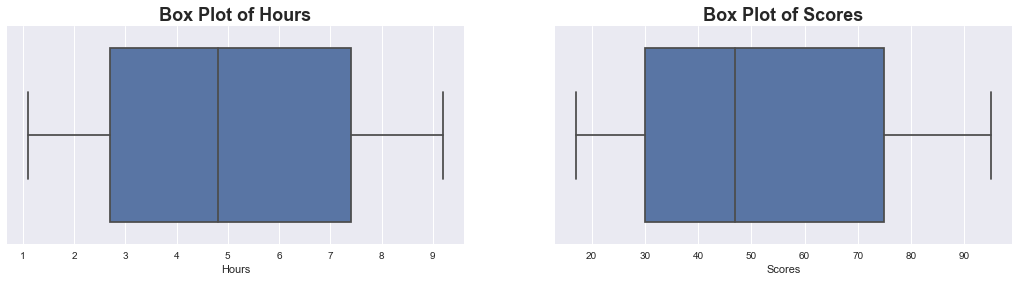

In [65]:
# Univariate analysis
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(x = 'Hours', data = df_marks)
plt.title('Box Plot of Hours', fontweight = 'bold', fontsize = 18)
plt.subplot(1,2,2)
sns.boxplot(x = 'Scores', data = df_marks)
plt.title('Box Plot of Scores',fontweight = 'bold', fontsize = 18)

plt.show()

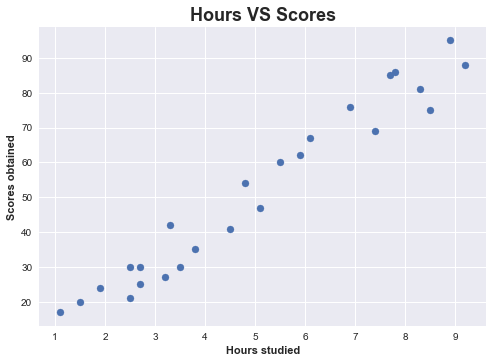

In [66]:
# Bivariate Analysis

plt.scatter(x = 'Hours', y = 'Scores' , data = df_marks)
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Hours VS Scores', fontweight = 'bold', fontsize = 18)
plt.show()

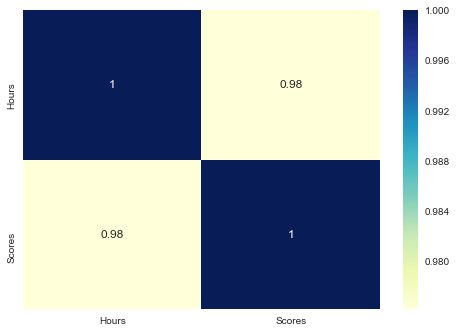

In [67]:
# Checking Correlation

sns.heatmap(df_marks.corr(), annot = True, cmap='YlGnBu')
plt.show()


Conclusion: Hours and Score is highly positively correlated with a correlation factor of 0.98

Model Building

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
# Creating X and Y sets 
X=df_marks.iloc[:,:-1].values
y=df_marks.iloc[:,1].values
print(type(X))

<type 'numpy.ndarray'>


In [70]:
# Performing test train split with 70-30 ratio
X_train, X_test,  y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)

In [71]:
# Checking the shapes for all the sets
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)

('X_train: ', (17, 1))
('X_test: ', (8, 1))


# Training using Sklearn model

In [73]:
from sklearn.linear_model import LinearRegression
lr_model_sk= LinearRegression()
lr_model_sk.fit(X_train, y_train)

#Prediction 
y_predict= lr_model_sk.predict(X_train)



In [75]:
##Finding out Intercept c & Slope of the line  m : "
print("c =",lr_model_sk.intercept_," m =",lr_model_sk.coef_[0])

('c =', 1.495142109236383, ' m =', 9.8717144285728278)


In [77]:

Y0 = lr_model_sk.intercept_ + lr_model_sk.coef_*X_train

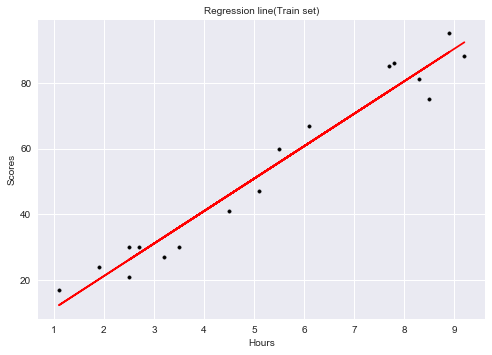

In [79]:
plt.scatter(X_train,y_train,color='black',marker='.')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=10)
plt.ylabel("Scores",fontsize=10)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [81]:
print("Accuracy on training dataset :",lr_model_sk.score(X_train, y_train)*100)
print("Accuracy on Testing dataset : ",lr_model_sk.score(X_test, y_test)*100)


('Accuracy on training dataset :', 95.707353540946926)
('Accuracy on Testing dataset : ', 93.094588626874369)


In [89]:
Prediction_score = lr_model_sk.predict([[9.25]])
print("predicting score for studing 9.25 hours per day is :",Prediction_score)

('predicting score for studing 9.25 hours per day is :', array([ 92.80850057]))


# Model Building using Stat Model

In [83]:

# Adding constant
X_train_sm = sm.add_constant(X_train)
# Buidling and fitting the model
lr_model = sm.OLS(y_train, X_train_sm).fit()
# Checking the models parameters
lr_model.params

array([ 1.49514211,  9.87171443])

In [84]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.15e-11
Time:                        22:50:17   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
x1             9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: The p - value for Hours is significant as the p value is less than 0.05 and the r-square is also 95.7% which means that 95.7% of the variance in the data is being explained by hours variable

In [85]:
# Adding constant to X test set
X_test_sm = sm.add_constant(X_test)
# Making predictions on the trained stats model
y_test_pred = lr_model.predict(X_test_sm)


In [86]:

# Checking the r- squared on the test set using stats model
r2score = r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_score of test set using stats model: ', (r2score)*100)

('R2_score of test set using stats model: ', 93.094588626874369)


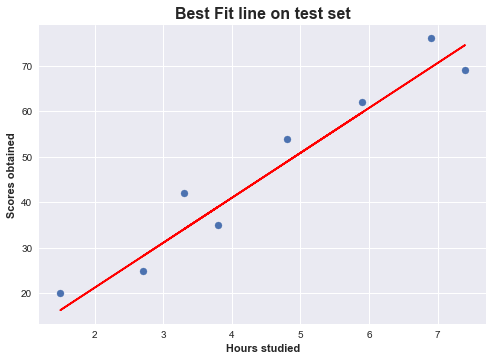

In [87]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Best Fit line on test set', fontweight = 'bold', fontsize = 16)
plt.show()

In [88]:
predicted_df=pd.DataFrame({"Actual":y_test,"Predicted":y_predicted_sk })
predicted_df

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


# Validating Linear Regression assumptions

Error terms should be normally distributed with mean 0

In [90]:
res=y_train_pred-y_train
#res

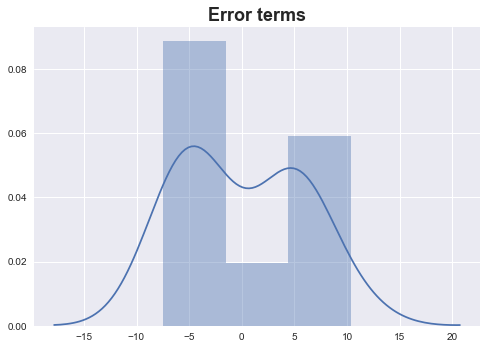

In [91]:
sns.distplot(res)
plt.title('Error terms',fontweight = 'bold', fontsize = 18)
plt.show()

Conclusion: It can be seen that the error terms are normally distributed with mean 0. Hence validated one of the assumptions of Linear Regression

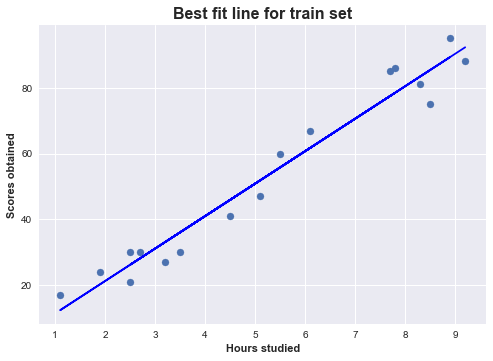

In [92]:
#Visualizing the fit on the train set
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'b')
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Best fit line for train set', fontweight = 'bold', fontsize = 16)
plt.show()

# Conclusion 
        
accuracy of model using  sklear   : 93.09 %
accuracy of model using  stat OLS : 93.09 %
    
Equation of model:
    ypred= 9.87 * Hours + 1.49


Predicting score for studing 9.25 hours per day is 92.80
    